<a href="https://colab.research.google.com/github/Jency07/Deep-learning-lab/blob/main/20MAI0026_Transfer_Learning_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ACTIVITY 1b - Transfer Learning Implementation - New dataset is large and similar to original dataset - Fine-tuning a pretrained model***

This technique is usually recommended when the training dataset is large and very similar to the original dataset that the pre-trained model was trained on.To improve performance, one might want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning. In this case, you tuned your weights such that your model learned high-level features specific to the dataset. 

Original Dataset - Imagenet Dataset

New Dataset - Dogs vs Cats Dataset

## **1. Importing libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

## **2. Loading the dataset**

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)


68608000/68606236 [==============================] - 0s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Roll No: 20MAI0026
*****************************




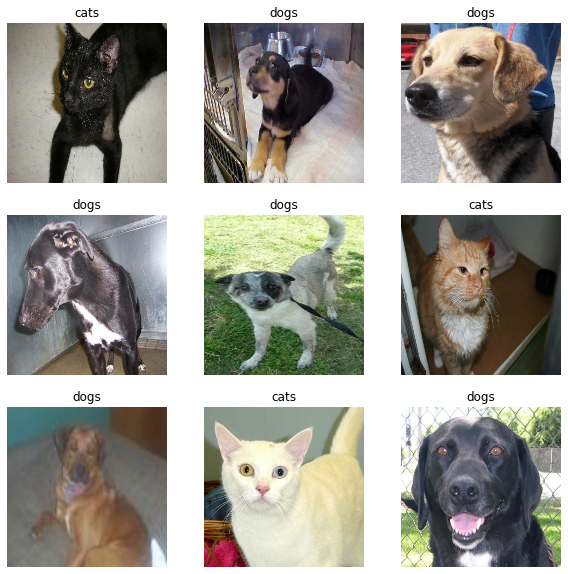

In [3]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## **3. Train Test Split**

In [4]:

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

#defining training and test sets
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Roll No: 20MAI0026
*****************************


Number of validation batches: 26
Number of test batches: 6


## **4. Feature Engineering**

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [6]:
#Image Data Augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

## **5.Base Model Creation**

In [12]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()
base_model.trainable = True
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Roll No: 20MAI0026
*****************************


Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
____________________________

In [13]:

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

## **6. Compiling the model**

In [15]:

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
base_learning_rate=0.0001
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()

Roll No: 20MAI0026
*****************************


Number of layers in the base model:  154
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_3 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_3 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________

## **7. Training the model**

In [16]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Roll No: 20MAI0026
*****************************


Epoch 1/10
63/63 [==============================] - 43s 100ms/step - loss: 0.3742 - accuracy: 0.8008 - val_loss: 0.0806 - val_accuracy: 0.9752
Epoch 2/10
63/63 [==============================] - 5s 77ms/step - loss: 0.1403 - accuracy: 0.9450 - val_loss: 0.0800 - val_accuracy: 0.9691
Epoch 3/10
63/63 [==============================] - 5s 77ms/step - loss: 0.1442 - accuracy: 0.9464 - val_loss: 0.0659 - val_accuracy: 0.9752
Epoch 4/10
63/63 [==============================] - 5s 78ms/step - loss: 0.1021 - accuracy: 0.9578 - val_loss: 0.0496 - val_accuracy: 0.9876
Epoch 5/10
63/63 [==============================] - 5s 82ms/step - loss: 0.0874 - accuracy: 0.9637 - val_loss: 0.0487 - val_accuracy: 0.9814
Epoch 6/10
63/63 [==============================] - 5s 78ms/step - loss: 0.0888 - accuracy: 0.9683 - val_loss: 0.0480 - val_accuracy: 0.9864
Epoch 7/10
63/63 [==============================] - 5s 78ms/step - loss: 0.0731 - accuracy: 0.9720 - 

In [17]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
#Fine Tuning
initial_epochs = 10
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Roll No: 20MAI0026
*****************************


Epoch 10/20
63/63 [==============================] - 5s 82ms/step - loss: 0.0742 - accuracy: 0.9710 - val_loss: 0.0422 - val_accuracy: 0.9851
Epoch 11/20
63/63 [==============================] - 5s 79ms/step - loss: 0.0658 - accuracy: 0.9710 - val_loss: 0.0399 - val_accuracy: 0.9851
Epoch 12/20
63/63 [==============================] - 5s 82ms/step - loss: 0.0606 - accuracy: 0.9770 - val_loss: 0.0472 - val_accuracy: 0.9851
Epoch 13/20
63/63 [==============================] - 5s 82ms/step - loss: 0.0525 - accuracy: 0.9815 - val_loss: 0.0431 - val_accuracy: 0.9876
Epoch 14/20
63/63 [==============================] - 5s 80ms/step - loss: 0.0554 - accuracy: 0.9790 - val_loss: 0.0435 - val_accuracy: 0.9839
Epoch 15/20
63/63 [==============================] - 5s 77ms/step - loss: 0.0477 - accuracy: 0.9805 - val_loss: 0.0489 - val_accuracy: 0.9827
Epoch 16/20
63/63 [==============================] - 5s 78ms/step - loss: 0.0492 - accuracy: 0.97

## **8. Testing the model**

Roll No: 20MAI0026
*****************************


Predictions:
 [0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0]
Labels:
 [0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


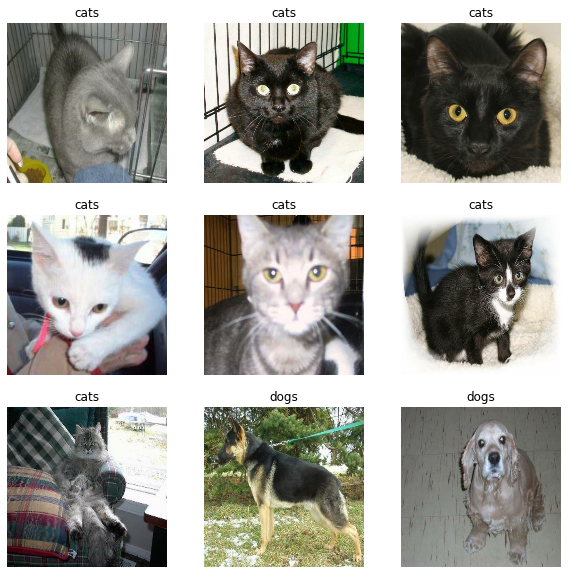

In [18]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

## ***9. Evaluation Metrics***

### ***Accuracy***

In [19]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

Roll No: 20MAI0026
*****************************


6/6 [==============================] - 1s 49ms/step - loss: 0.0431 - accuracy: 0.9792
Test accuracy : 0.9791666865348816
